In [1]:
import sys
sys.path.insert(0, '../')
import LMP19
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Define the parameter gamma which determins the 'fuzziness' and the state dimension
gamma = [-1,-1]
# Define the Fuzzy Quadratic object
FuQu = LMP19.Models.FuQu(gamma)
# Create Fuzzy Quadratic function
func = FuQu.eval

In [3]:
# Evaluate the Fuzzy Quadratic
lb , ub = [-10,-10],[10,10]
bounds = np.array([lb,ub]).T
dt = 0.1

xx_mesh = np.meshgrid(np.arange(lb[0],ub[0],dt),np.arange(lb[1],ub[1],dt))
xx = np.vstack([xx_mesh[0].ravel(), xx_mesh[1].ravel()])
yy = func(xx).reshape((200,200))

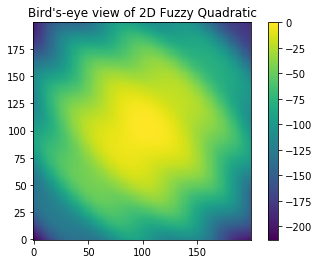

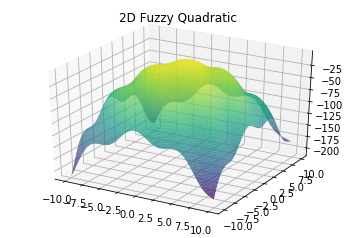

In [4]:
# View the 2D surface
vmin ,vmax = np.min(yy),np.max(yy)
plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Bird\'s-eye view of 2D Fuzzy Quadratic')
plt.show()

ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], yy, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
plt.title('2D Fuzzy Quadratic')
plt.show()

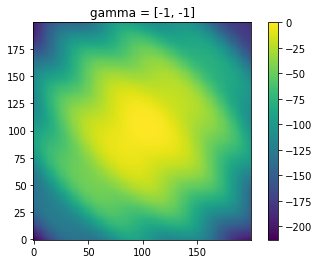

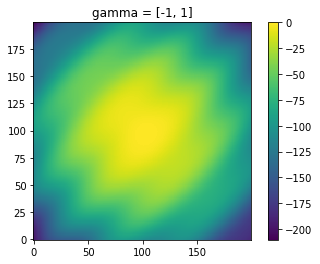

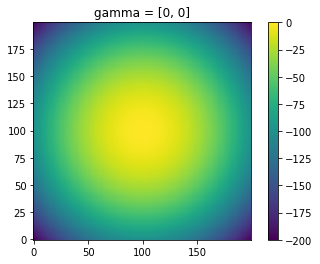

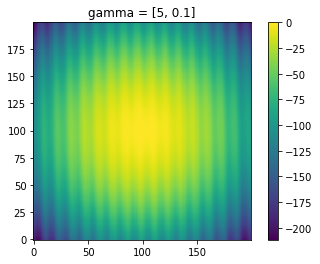

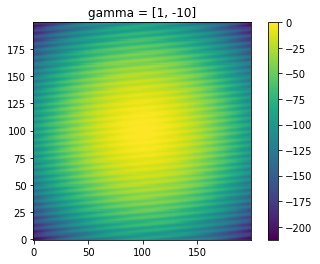

In [5]:
# Change the 'fuzziness' by changing gamma
Gamma = [[-1,-1],
         [-1,1],
         [0,0],
         [5,0.1],
         [1,-10]]

for gamma in Gamma:
    FuQu = LMP19.Models.FuQu(gamma)
    func = FuQu.eval
    lb , ub = [-10,-10],[10,10]
    bounds = np.array([lb,ub]).T
    dt = 0.1
    xx_mesh = np.meshgrid(np.arange(lb[0],ub[0],dt),np.arange(lb[1],ub[1],dt))
    xx = np.vstack([xx_mesh[0].ravel(), xx_mesh[1].ravel()])
    yy = func(xx).reshape((200,200))
    vmin ,vmax = np.min(yy),np.max(yy)
    plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title('gamma = %s'%(gamma))
    plt.show()

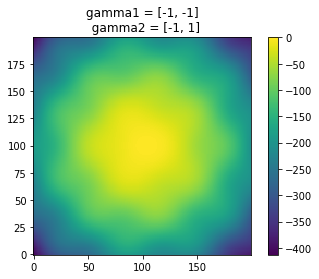

In [6]:
# Use FuQu to make more complicated functions
gamma1 = [-1,-1]
gamma2 = [-1,1]
f1 = LMP19.Models.FuQu(gamma1).eval 
f2 = LMP19.Models.FuQu(gamma2).eval 
def func(x):
    return(f1(x)+f2(x))
lb , ub = [-10,-10],[10,10]
bounds = np.array([lb,ub]).T
dt = 0.1
xx_mesh = np.meshgrid(np.arange(lb[0],ub[0],dt),np.arange(lb[1],ub[1],dt))
xx = np.vstack([xx_mesh[0].ravel(), xx_mesh[1].ravel()])
yy = func(xx).reshape((200,200))
vmin ,vmax = np.min(yy),np.max(yy)
plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('gamma1 = %s\n  gamma2 = %s'%(gamma1,gamma2))
plt.show()